# 인공 신경망

**패션 MNIST 데이터셋**

- 10 종류의 패션 아이템으로 구성
- 기존 손글씨 데이터셋인 MNIST의 패션 ver
- tensorflow 로 로드
- 0~9 의 숫자 레이블로 구성
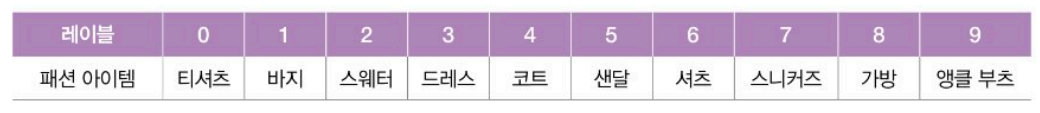

In [1]:
from tensorflow import keras
#자동으로 훈련/테스트 데이터 분류
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


테스트셋 : 28x28 크기의 60000개의 이미지

In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


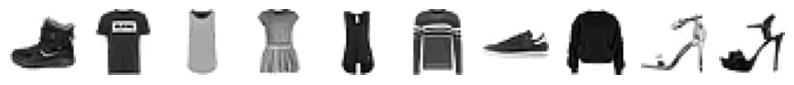

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')

plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
#레이블 당 개수 출력
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


**로지스틱 회귀로 패션 아이템 분류하기**
- 확률적 경사 하강법 SGDClassifier
- 0~1 값으로 변환
- 1차원 배열로 변환

9개의 각기 다른 방정식 생성, 각 픽셀을 특성으로 사용

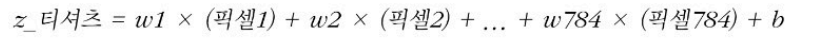
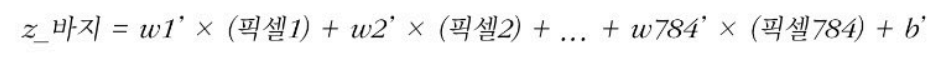

In [7]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
#교차검증
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8196000000000001


In [10]:
#반복 횟수 9일 때
sc = SGDClassifier(loss = 'log', max_iter = 9, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8303666666666667


In [11]:
#반복 횟수 20일 때
sc = SGDClassifier(loss = 'log', max_iter = 20, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8436666666666666


**인공신경망**

뉴런(유닛) : z값을 계산하는 단위

각 픽셀 -> x1, x2, x3 .. -> 입력층

각 클래스마다 z값 -> z1, z2, z3 .. -> 출력층

ex) w11 -> 특성 x1에 곱해지며 z1값을 만드는 가중치
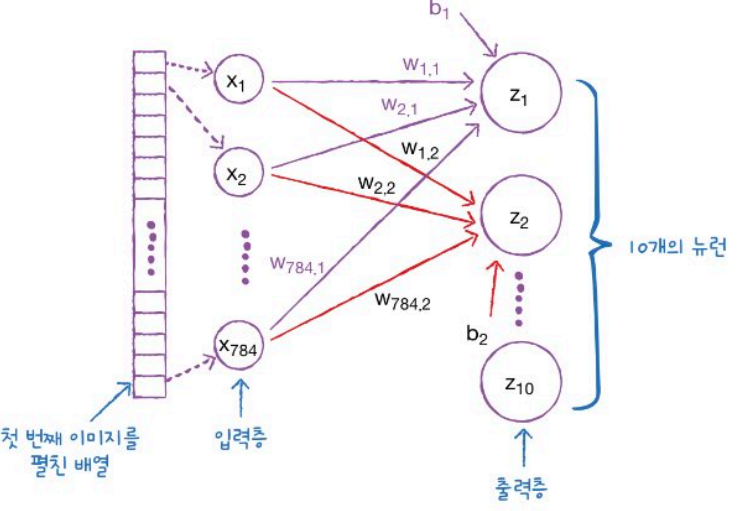

**텐서플로와 케라스**

텐서플로 : 구글이 오픈소스로 공개한 딥러닝 라이브러리

케라스 : 텐서플로의 고수준 API. 딥러닝 라이브러리
- API : 서로 다른 애플리케이션들 사이의 의사소통을 원활하게 하기 위한 규칙과 명령어들의 모음
- 탠서플로우를 사용하여 딥러닝 모델을 구축하기 위해 케라스를 사용할 수 있음
-------------------------------------
* 딥러닝 라이브러리는 벡터의 행렬 연산에 최적화 되어어있는 그래픽 처리 장치 GPU 사용
- 케라스는 직접 GPU연산을 할 수 없어, 텐서플로와 같은 라이브러리를 백엔드로 사용

**인공 신경망으로 모델 만들기**

- 밀집층(완전 연결층) : 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되어 있는 층
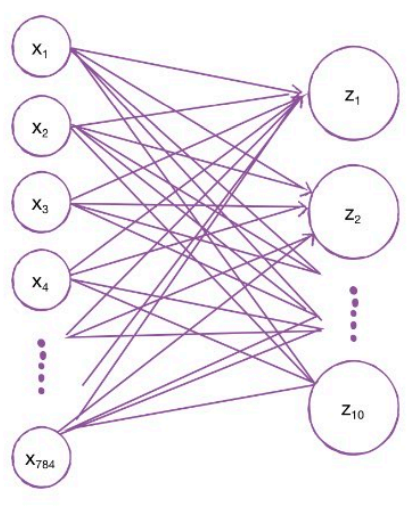
- 784*10 개의 연결된 선

In [12]:
from tensorflow import keras

인공신경망에서는 교차 검증을 잘 사용하지 않고 검증세트 별도로 만들어 검증

- 딥러닝 분야의 데이터셋이 충분히 커 검증 점수가 안정적
- 교차검증을 수행하기에 훈련 시간 너무 오래 걸림

In [13]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [14]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [15]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [16]:
#밀집층 생성
#매개변수 = (뉴런 개수, 뉴련 출력에 적용할 함수(활성화 함), 입력의 크기)
dense = keras.layers.Dense(10, activation = 'softmax', input_shape=(784,))

In [17]:
#신경망 모델 생성
model = keras.Sequential(dense)

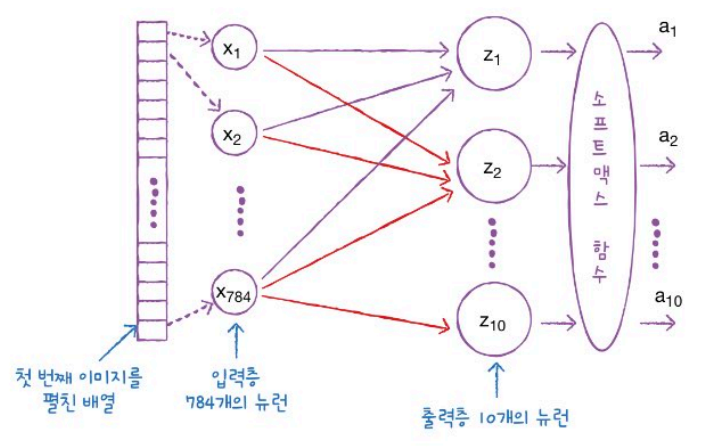

**인공 신경망으로 패션 아이템 분류하기**

- 이진 분류 : loss = 'binary_crossentropy'
> 출력층에 양성 클래스에 대한 확률을 출력하는 하나의 뉴런만 존재
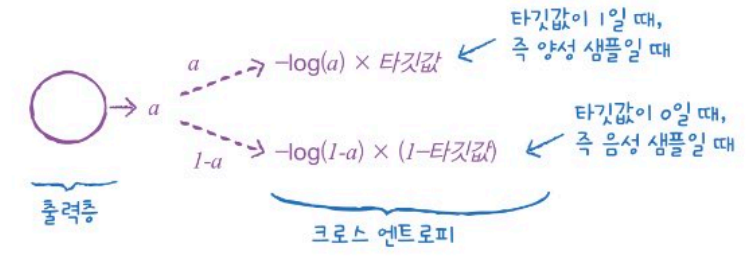
- 다중 분류 : loss = 'categorical_crossentropy'
>출력층엔 각 클래스에 대한 확률을 출력하는 클래스 수 만큼의 뉴런 존재. 타깃에 해당하는 확률만 남겨놓기 위해 나머지 확률엔 0 곱(원-핫 인코딩)
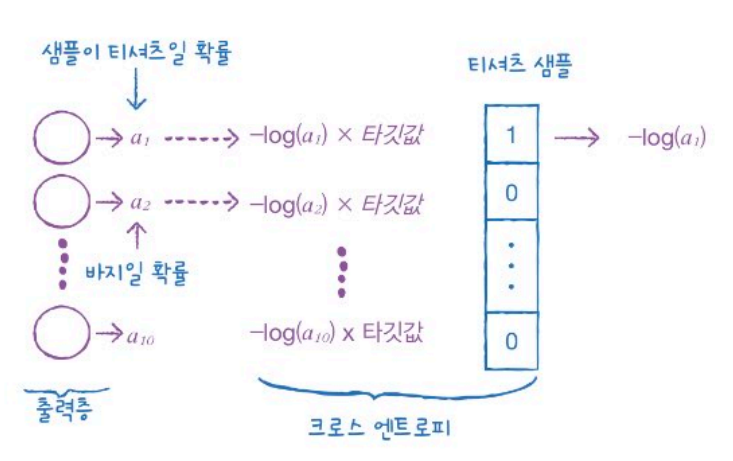

**원-핫 인코딩**
다중 클래스 분류 문제에서 타깃값을 해당 클래스만 1이고 나머지는 0인 배열로 만드는 것

* sparse_categorical_crossentropy 함수의 경우 원-핫 인코딩 하지 않고 정수로 된 타깃값을 사용해 크로스 엔트로피 손실 계산

In [18]:
# 모델 설정
# 매개변수 = (손실함수 종류, 측정값)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [19]:
#훈련
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 8s 2ms/step - loss: 0.6076 - accuracy: 0.7937
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4748 - accuracy: 0.8392
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4504 - accuracy: 0.8480
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4366 - accuracy: 0.8515
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4288 - accuracy: 0.8548


In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.8483


[0.4387349784374237, 0.8483333587646484]

# 7-2 심층 신경망

**2개의 층**

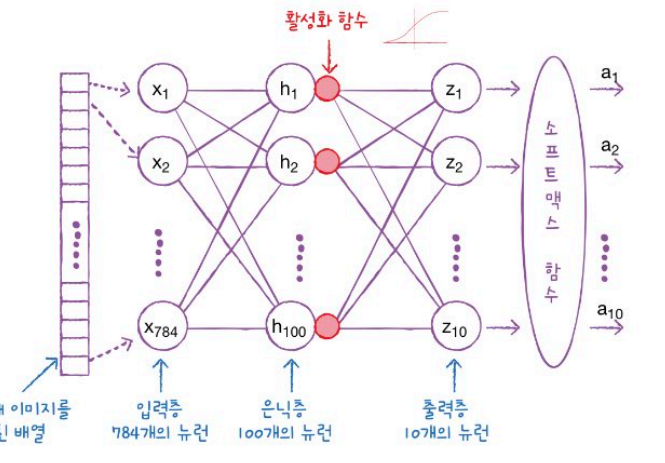

**은닉층**

입력층과 출력층 사이의 모든 층
- 모든 은닉층에는 활성화 함수가 존재
- 출력층의 활성화 함수는 시그모이드/소프트맥스로 제한되어있지만 은닉층의 활성함수는 렐루 등 추가적으로 자유롭게 사용 가능

*회귀의 경우 값 자체를 예측으로 활용하여 활성화함수 필요 X

은닉층에 활성화 함수가 있는 이유
> 활성화 함수 없이 선형계산만 이뤄진다면 수행 역할의 의미가 없어지므로 비선형적으로 변형해주기 위해

(b의 역할 사라짐)
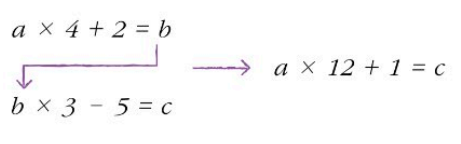


In [21]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [22]:
from sklearn.model_selection import train_test_split
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state =42)

In [23]:
# Dense 클래스 생성
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)) #뉴런 수 100으로 임의 지정(출력 층의 뉴런수보다는 많게)
dense2 = keras.layers.Dense(10, activation = 'softmax')

* 신경망의 첫 번째 층 input shape매개변수로 입력


In [24]:
#심층 신경망 생성
model = keras.Sequential([dense1, dense2])

In [25]:
#층에 대한 정보
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


outshape
- 첫 번째 차원 : 샘플의 개수 -> batch size 에 따라 다르기 때문에 None으로 설정
- 두 번째 차원 : 출력의 개수 (뉴런 개수)

param
ex) 78500 = 784 X 100 +100

In [26]:
# 층 한번에 추가하기
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,),
                       name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output')], name = '패션 MNIST 모델')

In [27]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
#층 하나씩 추가하기
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5681 - accuracy: 0.8066
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4106 - accuracy: 0.8530
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3758 - accuracy: 0.8649
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3530 - accuracy: 0.8720
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3364 - accuracy: 0.8783


추가된 층으로 인해 성능 향상

**렐루 함수**

시그모이드 함수의 단점(기울기 소실 문제)
- 입력값이 매우 크거나 작으면 기울기도 0에 가까워지기 때문에 가중치가 느리게 업데이트 되어 학습 과정 지연
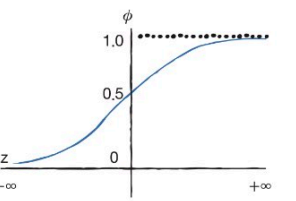

렐루 함수
- 입력이 양수일 경우 그대로, 음수일 경우 0으로 출력
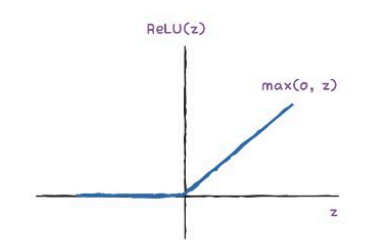

**Flatten 층**

- 인공 신경망에 주입하기 위해 일차원으로 펼칠 때 reshape 대신 사용하는 층
- 학습이 이뤄지진 않음


In [31]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu')) #relu함수 적용
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [32]:
model.summary() #전과 달리 입력값의 차원 짐작 가능

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [34]:
from sklearn.model_selection import train_test_split
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state =42)

In [35]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5442 - accuracy: 0.8092
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3958 - accuracy: 0.8599
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3574 - accuracy: 0.8711
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3340 - accuracy: 0.8800
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3166 - accuracy: 0.8863


시그모이드 함수 사용한 은닉층보다 성능 조금 향상

In [36]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3629 - accuracy: 0.8764


[0.3629026412963867, 0.8764166831970215]

**옵티마이저**

- optimization(최적화) : 손실함수의 최소값을 찾으며 최적의 하이퍼 파라미터를 찾는 것
- optimizer (최적화 알고리즘) : 최적화를 수행하는 알고리즘

*신경망에는 추가할 은닉층 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈, 에포크 등 여러 하이퍼파라미터 존재

**케라스의 여러 옵티마이저**

<기본 경사 하강법 옵티마이저>
- SGD(확률적 경사하강법) : SGD이지만 1개의 샘플이 아닌 미니배치 사용
> momentum 매개변수 : default = 0, 0보다 크게 지정하면 이전의 그레디언트를 가속도처럼 사용하는 모멘텀 최적화 사용
> nesterov 매개변수 : default = False, True 일 경우 네스테로프 모멘텀 최적화 사용(최적화 2번 반복)

<적응적 학습률 옵티마이저>

모델이 최적점에 갈수록 학습률 낮춤 (default = 0.001)

- RMSprop
- Adagrad
- Adam : 모멘텀 최적화와 RMSprop의 장점을 접목한 옵티마이저

In [37]:
#sgd optimizer
#SGD 클래스로 객체 생성하지 않고 'sgd'로 사용 가능
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [38]:
#SGD 학습률 조정
sgd = keras.optimizers.SGD(learning_rate = 0.1)

In [39]:
#네스테로프, 모멘텀 사용
sgd = keras.optimizers.SGD(momentum= 0.9, nesterov = True)

In [40]:
#adagrad optimizer
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [41]:
#RMSprop optimizer
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') #

In [42]:
#Adam optimizer
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [43]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5216 - accuracy: 0.8186
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3925 - accuracy: 0.8599
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3473 - accuracy: 0.8745
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3226 - accuracy: 0.8819
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3018 - accuracy: 0.8898


In [44]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3446 - accuracy: 0.8751


[0.3446180522441864, 0.875083327293396]

# 신경망 모델 훈련

** 손실곡선**

- keras 의 fit 메서드는 Hisotry 객체 반환하여 훈련 과정 손실, 정확도 값을 저장


In [45]:
# 모델 만드는 함수
def model_fn(a_layer = None): #매개변수 : 은닉층 뒤에 추가할 층
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer :
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [46]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [47]:
#fit 결과 history에 담기
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

verbose 매개변수 : 훈련 과정 출력 조정. 0일 경우 출력X

In [48]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


손실, 정확도 포함

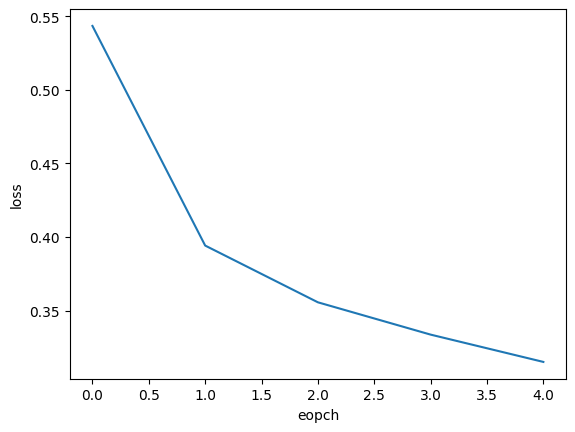

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('eopch')
plt.ylabel('loss')
plt.show()

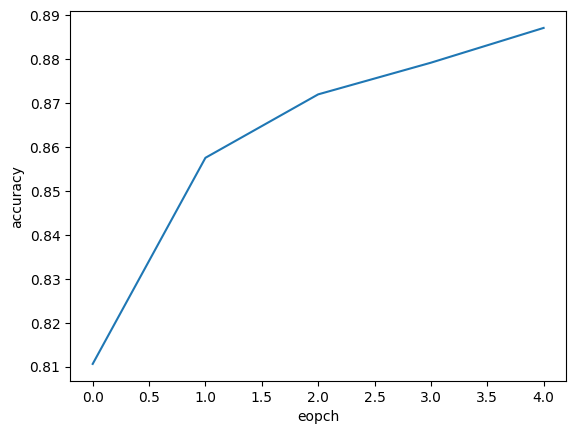

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('eopch')
plt.ylabel('accuracy')
plt.show()

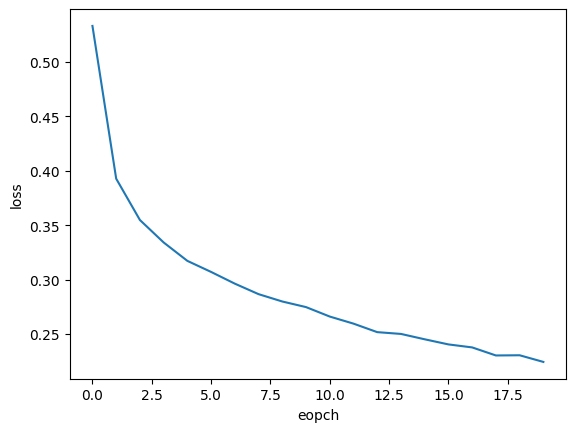

In [51]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('eopch')
plt.ylabel('loss')
plt.show()

정확도 평가 vs 손실 평가
- 인공 신경망이 최적화 하는 대상은 손실 함수이며 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있으므로 손실 값으로 평가하는 것이 더 좋음.

In [52]:
#각 epoch 마다 검증세트로 과대적합 조사
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data =(val_scaled, val_target))

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


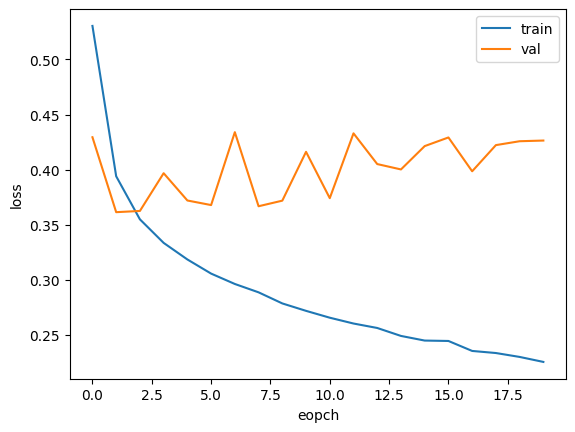

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eopch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

epoch 증가 할수록 검증 셋 손실 증가하고 훈련 셋 손실은 감소하는 과대적합 모델

**인공 신경망 과대적합 제어**

- 옵티마이저의 하이퍼파라미터 조절

In [57]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data =(val_scaled, val_target))

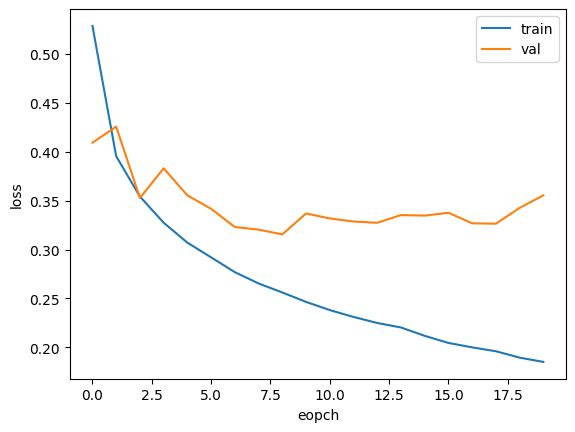

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eopch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

적응적 학습률을 사용하는 Adam 으로 훈련 시 과대적합 완화

**드롭아웃**

훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(출력을 0으로 만들어)과대적합을 막는다.
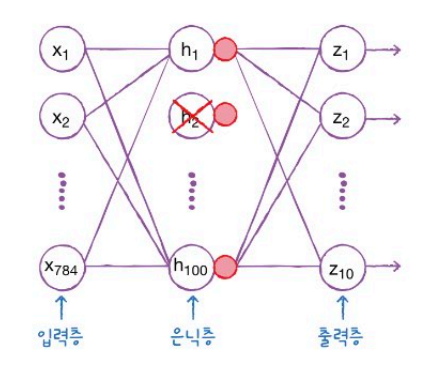

- 드롭아웃이 과대적합을 막을 수 있는 이유
>일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있음, 앙상블 학습하는 효과

- 검증 셋, 테스트 셋에선 드롭아웃 적용X



Q. 드롭 아웃 무슨 효과?

In [62]:
model = model_fn(keras.layers.Dropout(0.3)) #어떠한 층의 30% 드롭아웃

In [63]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


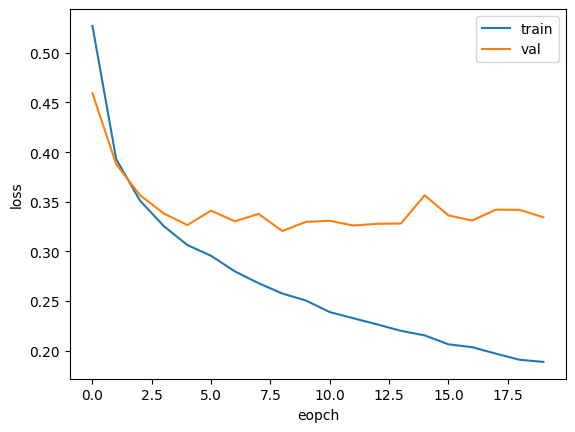

In [64]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data =(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eopch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합 어느정도 감소

**모델 저장과 복원**

In [82]:
#epoch 10으로 지정
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data =(val_scaled, val_target))

In [83]:
#모델 파라미터 저장
model.save_weights('model-weights.h5')

In [84]:
#모델 구조와 파라미터 저장
model.save('model-whole.h5')

In [85]:
#파일 확인
!ls -al &.h5

/bin/bash: line 1: .h5: command not found
total 1308
drwxr-xr-x 1 root root   4096 Aug  1 17:14 .
drwxr-xr-x 1 root root   4096 Aug  1 15:49 ..
drwxr-xr-x 4 root root   4096 Jul 28 13:31 .config
drwxr-xr-x 2 root root   4096 Aug  1 17:11 .ipynb_checkpoints
-rw-r--r-- 1 root root 333320 Aug  1 17:14 model-weights.h5
-rw-r--r-- 1 root root 981176 Aug  1 17:14 model-whole.h5
drwxr-xr-x 1 root root   4096 Jul 28 13:32 sample_data


In [86]:
#훈련을 하지 않은 새 모델 생성 후 가중치 파일 사용하기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [87]:
#모든 샘플의 각 클래스에 대한 확률 예측
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1) #배열의 마지막 차원(2차원의 경우 좌우)을 따라 최댓값 고름
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.885


evaluate() 함수 사용할 수 없는 이유
- evaluate 메서드로 손실을 계산하기 위해 compile() 메서드를 먼저 실행해야 하기 때문

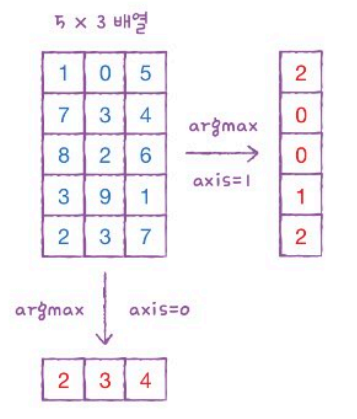

In [88]:
#모델 전체를 파일에서 가져오기
model = keras.models.load_model('/content/model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8850


[0.322687566280365, 0.8849999904632568]

모델 생성 + 가중치 파일 불러오기, 모델 불러오기 둘 다 같은 정확도 결과 냄

**콜백**

훈련 과정 중에 어떤 작업을 수행할 수 있게 하는 객체

- 콜백 객체를 fit() 메서드의 callbacks 매개변수에 리스트로 전달
-  default : 에포크 마다 모델 저장
- save_best_only = True 로 지정하여 가장 낮은 검증 점수를 만드는 모델만 저장

**조기종료**

검증세트가 가장 낮은 지점에서 훈련을 종료하는 것

- keras) EarlyStoping 콜백 제공
> patience 매개변수 : 검증 점수가 향상되지 않더라도 참을 에포크 횟수
>
ex) 2 -> 2번 연속 상승 하지 않을 시 훈련 중지
>restore_best_weights 매개변수 : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

In [89]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
#콜백 객체 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only =True)
model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data =(val_scaled, val_target), callbacks = [checkpoint_cb])

In [91]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3125 - accuracy: 0.8874


[0.31245073676109314, 0.887416660785675]

In [96]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
#콜백 객체 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only =True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data =(val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

In [97]:
#조기종료된 에폭
print(early_stopping_cb.stopped_epoch)

12


13번째 epoch 에서 조기종료, patience 가 2이므로 11번째 epoch이 최상의 조

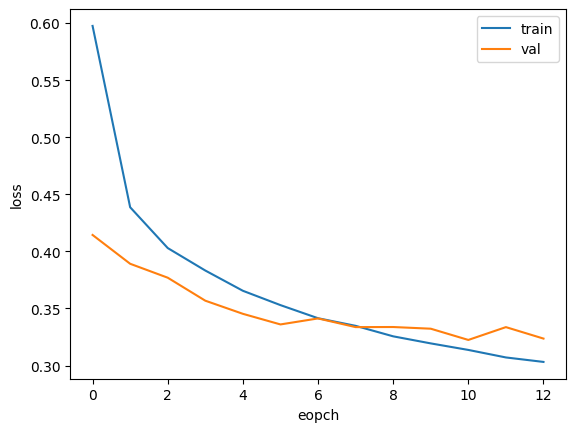

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eopch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [99]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.8843


[0.3224603533744812, 0.8843333125114441]